# Notebook to run basic analysis on processed data after cellbender - FPR 0.1, full Model

**Created by :** Srivalli Kolla

**Created on :** 06 February, 2025

**Modified on :** 06 February, 2025

**Institute of SystemsImmunology, University of Würuburg**

Env : scanpy(Python 3.12.4)

# Importing Packages

In [1]:
import anndata as ad
import scanpy as sc
import bbknn
import os
import datetime
import numba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scrublet as scr
from scipy.stats import median_abs_deviation

/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython              3.0.11
PIL                 11.1.0
annoy               NA
asttokens           NA
bbknn               1.6.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython              3.0.11
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.1.1
executing           2.1.0
h5py                3.12.1
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.8
legacy_api_wrap     NA
llvmlite            0.44.0
matplotlib          3.10.0
mpl_toolkits        NA
natsort             8.4.0
numba               0.61.0
numpy               2.1.3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
pickleshare         0.7.5
platformdirs        4.3.6
prompt_toolkit      3.0.50
psutil              6.1.1
pure_eval           0.2.3
pydev_ipython       NA
pydevconsole   

# Files creation

## Sample wise h5ad

In [3]:
sample_dirs = ['A9_2', 'A10_2', 'A11_2', 'A12_2','B1_2', 'B2_2']
cellbender_data = '../cellbender_data/0.1_full/'

cellbender_file_paths = [os.path.join(cellbender_data, sample, f"{sample}_filtered.h5") for sample in sample_dirs]

1. Define Genotype mapping
2. Read the cellbender file paths and load them into anndata objects
3. Make var names unique
4. Concatenate the Processed Datasets into a Single AnnData Object
5. Create a List of Sample Names by splittling the sample folder
6. Add genotype info
7. Create output directories

In [4]:
sample_to_genotype = {
    'A9_2': 'WT',
    'A10_2': 'WT',
    'A11_2': 'Mdx',
    'A12_2': 'Mdx',
    'B1_2': 'MdxSCID',
    'B2_2': 'MdxSCID'
}


processed_data = [sc.read_10x_h5(file_path) for file_path in cellbender_file_paths]


for after_cb in processed_data:
    after_cb.var_names_make_unique()


after_cb = ad.concat(processed_data, keys=sample_dirs, label='sample')


sample_names = [os.path.splitext(sample)[0] for sample in sample_dirs]


after_cb.obs['genotype'] = after_cb.obs['sample'].map(sample_to_genotype)


output_dir = "../cellbender_data/0.1_full/separated_h5ad_files" 
os.makedirs(output_dir, exist_ok=True)

reading ../cellbender_data/0.1_full/A9_2/A9_2_filtered.h5
 (0:00:00)
reading ../cellbender_data/0.1_full/A10_2/A10_2_filtered.h5


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../cellbender_data/0.1_full/A11_2/A11_2_filtered.h5


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../cellbender_data/0.1_full/A12_2/A12_2_filtered.h5


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../cellbender_data/0.1_full/B1_2/B1_2_filtered.h5


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../cellbender_data/0.1_full/B2_2/B2_2_filtered.h5


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
for sample in sample_dirs:
    sample_data = after_cb[after_cb.obs['sample'] == sample].copy()
    output_path = os.path.join(output_dir, f"{sample}.h5ad")
    sample_data.write_h5ad(output_path)
    print(f"Saved {output_path}")

Saved ../cellbender_data/0.1_full/separated_h5ad_files/A9_2.h5ad


Saved ../cellbender_data/0.1_full/separated_h5ad_files/A10_2.h5ad
Saved ../cellbender_data/0.1_full/separated_h5ad_files/A11_2.h5ad
Saved ../cellbender_data/0.1_full/separated_h5ad_files/A12_2.h5ad
Saved ../cellbender_data/0.1_full/separated_h5ad_files/B1_2.h5ad
Saved ../cellbender_data/0.1_full/separated_h5ad_files/B2_2.h5ad


# Gene expression before QC

In [6]:
genes_of_interest = ["Ttn", "Dcn", "Dmd"]


for sample in sample_dirs:
    sample_data = after_cb[after_cb.obs['sample'] == sample].copy()
    
    sc.pp.highly_variable_genes(sample_data,flavor = "seurat_v3",batch_key = "sample",subset = True, n_top_genes= 8000)
    sc.pp.normalize_total(sample_data, target_sum= 1e6)
    sc.pp.log1p(sample_data)
    sc.pp.pca(sample_data, n_comps = 50, use_highly_variable = True, svd_solver = 'arpack', random_state = 1712)
    sc.pp.neighbors(sample_data, use_rep = "X_pca", n_neighbors = 50, metric = 'minkowski', random_state = 1786)
    sc.tl.umap(sample_data)

    for gene in genes_of_interest:
        if gene in sample_data.var_names:
            sc.pl.umap(sample_data, color=gene, save=f"_{sample}_{gene}_before_qc.png", show=False)
            print(f"Saved UMAP for {sample} - {gene}")
        else:
            print(f"Warning: Gene {gene} not found in {sample}")

extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:11)
Saved UMAP for A9_2 - Ttn
Saved UMAP for A9_2 - Dcn
Saved UMAP for A9_2 - Dmd
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:02)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:32)
Saved UMAP for A10_2 - Ttn
Saved UMAP for A10_2 - Dcn
Saved UMAP for A10_2 - Dmd
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:02)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:07)
Saved UMAP for A11_2 - Ttn
Saved UMAP for A11_2 - Dcn
Saved UMAP for A11_2 - Dmd
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:02)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:05)
Saved UMAP for A12_2 - Ttn
Saved UMAP for A12_2 - Dcn
Saved UMAP for A12_2 - Dmd
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:04)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:34)
Saved UMAP for B1_2 - Ttn
Saved UMAP for B1_2 - Dcn
Saved UMAP for B1_2 - Dmd
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:10)
Saved UMAP for B2_2 - Ttn
Saved UMAP for B2_2 - Dcn
Saved UMAP for B2_2 - Dmd


# Quality check

## Raw data check

In [7]:
def X_is_raw(after_cb):
    return np.array_equal(after_cb.X.sum(axis=0).astype(int), after_cb.X.sum(axis=0))

In [8]:
print(X_is_raw(after_cb))

True


## Doublets check

1. List of samples
2. Subsetting samples based on sample_name
3. Doublet score calculation
4. Assign doublet scores to the sample
5. Plotting

In [9]:
sample_names = after_cb.obs['sample'].unique()

for sample_name in sample_names:
    mask = after_cb.obs['sample'] == sample_name
    sample_after_cb = after_cb[mask].copy()

    scrub = scr.Scrublet(sample_after_cb.X)

    sample_after_cb.obs['doublet_scores'], sample_after_cb.obs['predicted_doublets'] = scrub.scrub_doublets()

    after_cb.obs.loc[mask, 'doublet_scores'] = sample_after_cb.obs['doublet_scores']
    after_cb.obs.loc[mask, 'predicted_doublets'] = sample_after_cb.obs['predicted_doublets']
    
    #scrub.plot_histogram()

    #plt.show()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 5.6 seconds
Preprocessing...


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scrublet/helper_functions.py:321: RuntimeWarning: divide by zero encountered in divide
  w.setdiag(float(target_total) / tots_use)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Elapsed time: 101.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 10.9%
Estimated detectable doublet fraction = 55.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 19.7%
Elapsed time: 11.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 9.0%
Estimated detectable doublet fraction = 48.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 18.4%
Elapsed time: 8.6 seconds
Preprocessing...


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scrublet/helper_functions.py:321: RuntimeWarning: divide by zero encountered in divide
  w.setdiag(float(target_total) / tots_use)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.86
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 96.9 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 18.8 seconds


### Checking the count and percentage of Doublets - Anndata level

In [10]:
doub_tab = pd.crosstab(after_cb.obs['sample'],after_cb.obs['predicted_doublets'])
doub_tab.sum()

predicted_doublets
False    121653
True       2783
dtype: int64

In [11]:
true_doublets = after_cb.obs['predicted_doublets'] == True
true_doublets_count = true_doublets.sum()

true_doublets_percentage = (true_doublets_count / len(after_cb.obs)) * 100

true_doublets_count ,true_doublets_percentage

(np.int64(2783), np.float64(1.4781648023625142))

### Checking the count of Doublets - Sample level

In [12]:
doublet_counts_per_sample = after_cb.obs.groupby(['sample', 'genotype'])['predicted_doublets'].sum()

print(doublet_counts_per_sample)

sample  genotype
A9_2    Mdx            0
        MdxSCID        0
        WT             0
A10_2   Mdx            0
        MdxSCID        0
        WT             0
A11_2   Mdx         1670
        MdxSCID        0
        WT             0
A12_2   Mdx         1113
        MdxSCID        0
        WT             0
B1_2    Mdx            0
        MdxSCID        0
        WT             0
B2_2    Mdx            0
        MdxSCID        0
        WT             0
Name: predicted_doublets, dtype: object


/tmp/ipykernel_84310/2133624876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_counts_per_sample = after_cb.obs.groupby(['sample', 'genotype'])['predicted_doublets'].sum()


/tmp/ipykernel_84310/4247018625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_counts = after_cb.obs.groupby("sample")["predicted_doublets"].sum().reset_index()


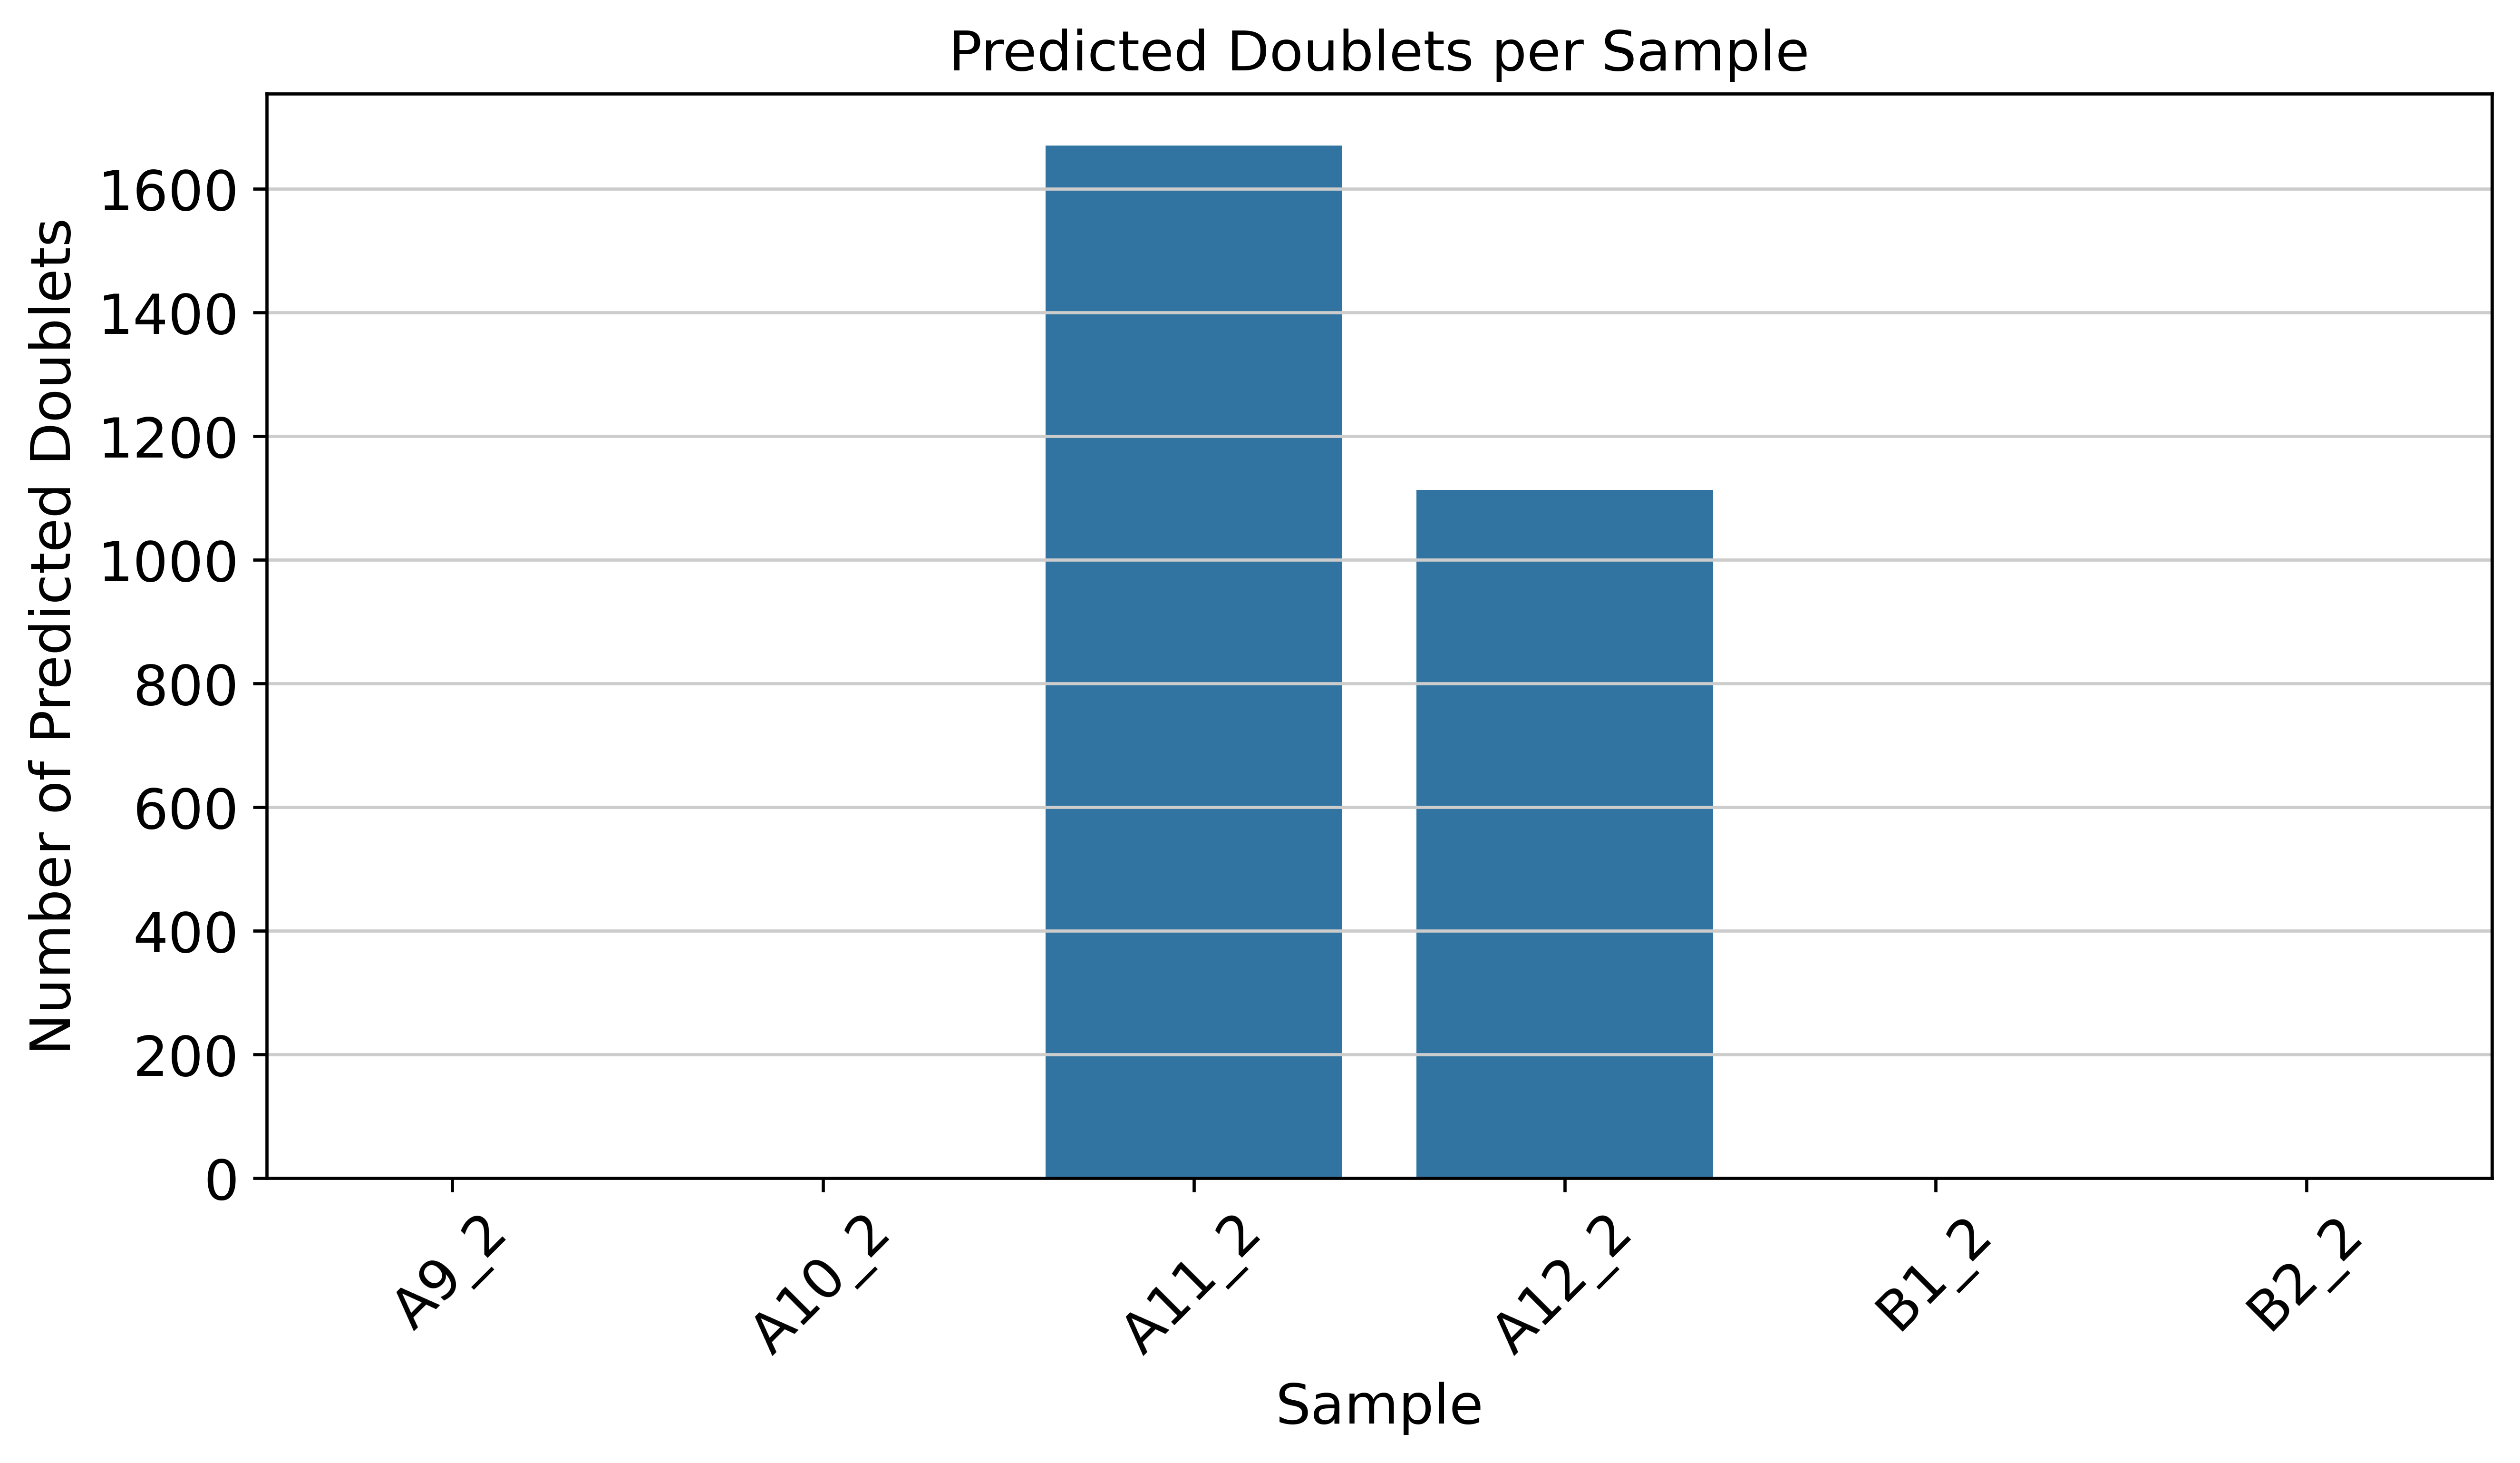

In [13]:
doublet_counts = after_cb.obs.groupby("sample")["predicted_doublets"].sum().reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(x=doublet_counts["sample"], y=doublet_counts["predicted_doublets"])
plt.xticks(rotation=45)
plt.xlabel("Sample")
plt.ylabel("Number of Predicted Doublets")
plt.title("Predicted Doublets per Sample")
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'A9_2'),
  Text(1, 0, 'A10_2'),
  Text(2, 0, 'A11_2'),
  Text(3, 0, 'A12_2'),
  Text(4, 0, 'B1_2'),
  Text(5, 0, 'B2_2')])

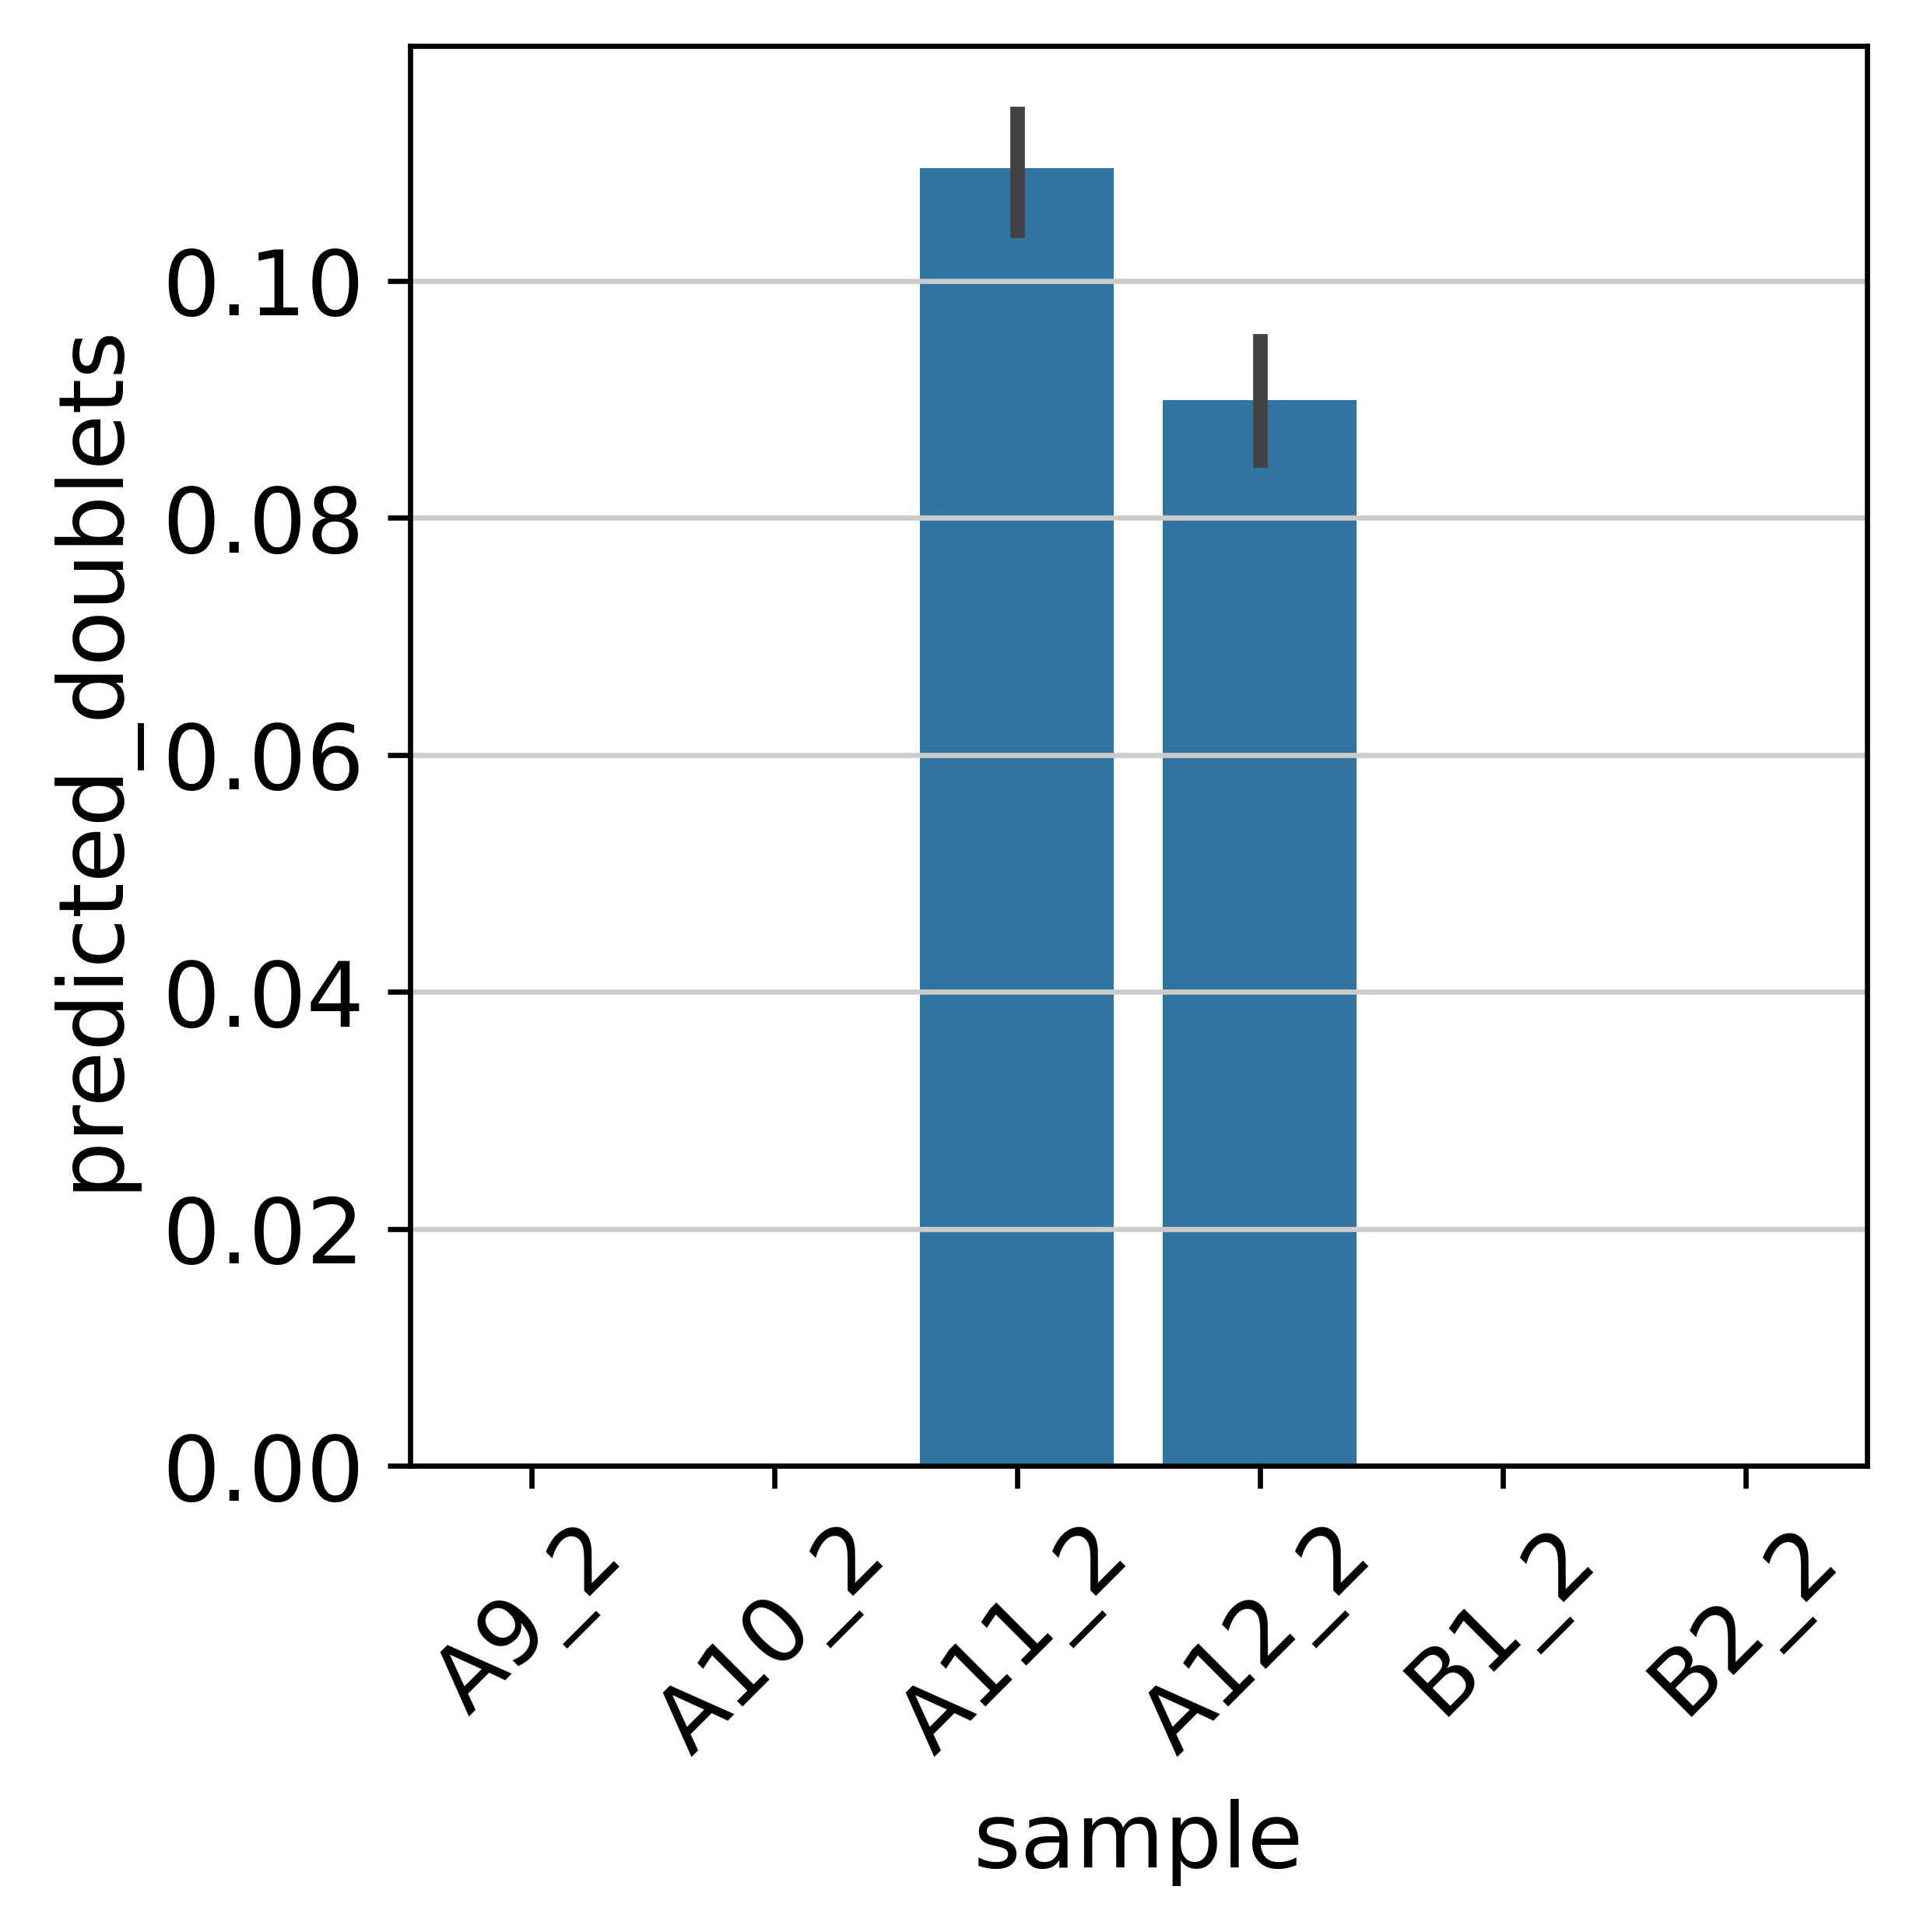

In [14]:
after_cb.obs_names_make_unique()
sns.barplot(x=after_cb.obs['sample'], y=after_cb.obs['predicted_doublets'])
plt.xticks(rotation = 45)

## Mitochondrial and Ribosomal gene check

In [15]:
after_cb.var["mt"] = after_cb.var_names.str.startswith("mt-")

after_cb.var["ribo"] = after_cb.var_names.str.startswith(("Rps", "Rpl"))

In [16]:
ribo_counts = after_cb.var['ribo'].value_counts()

mt_counts = after_cb.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32184
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32272
True: 13


In [17]:
sc.pp.calculate_qc_metrics(after_cb, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
after_cb

AnnData object with n_obs × n_vars = 188274 × 32285
    obs: 'sample', 'genotype', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

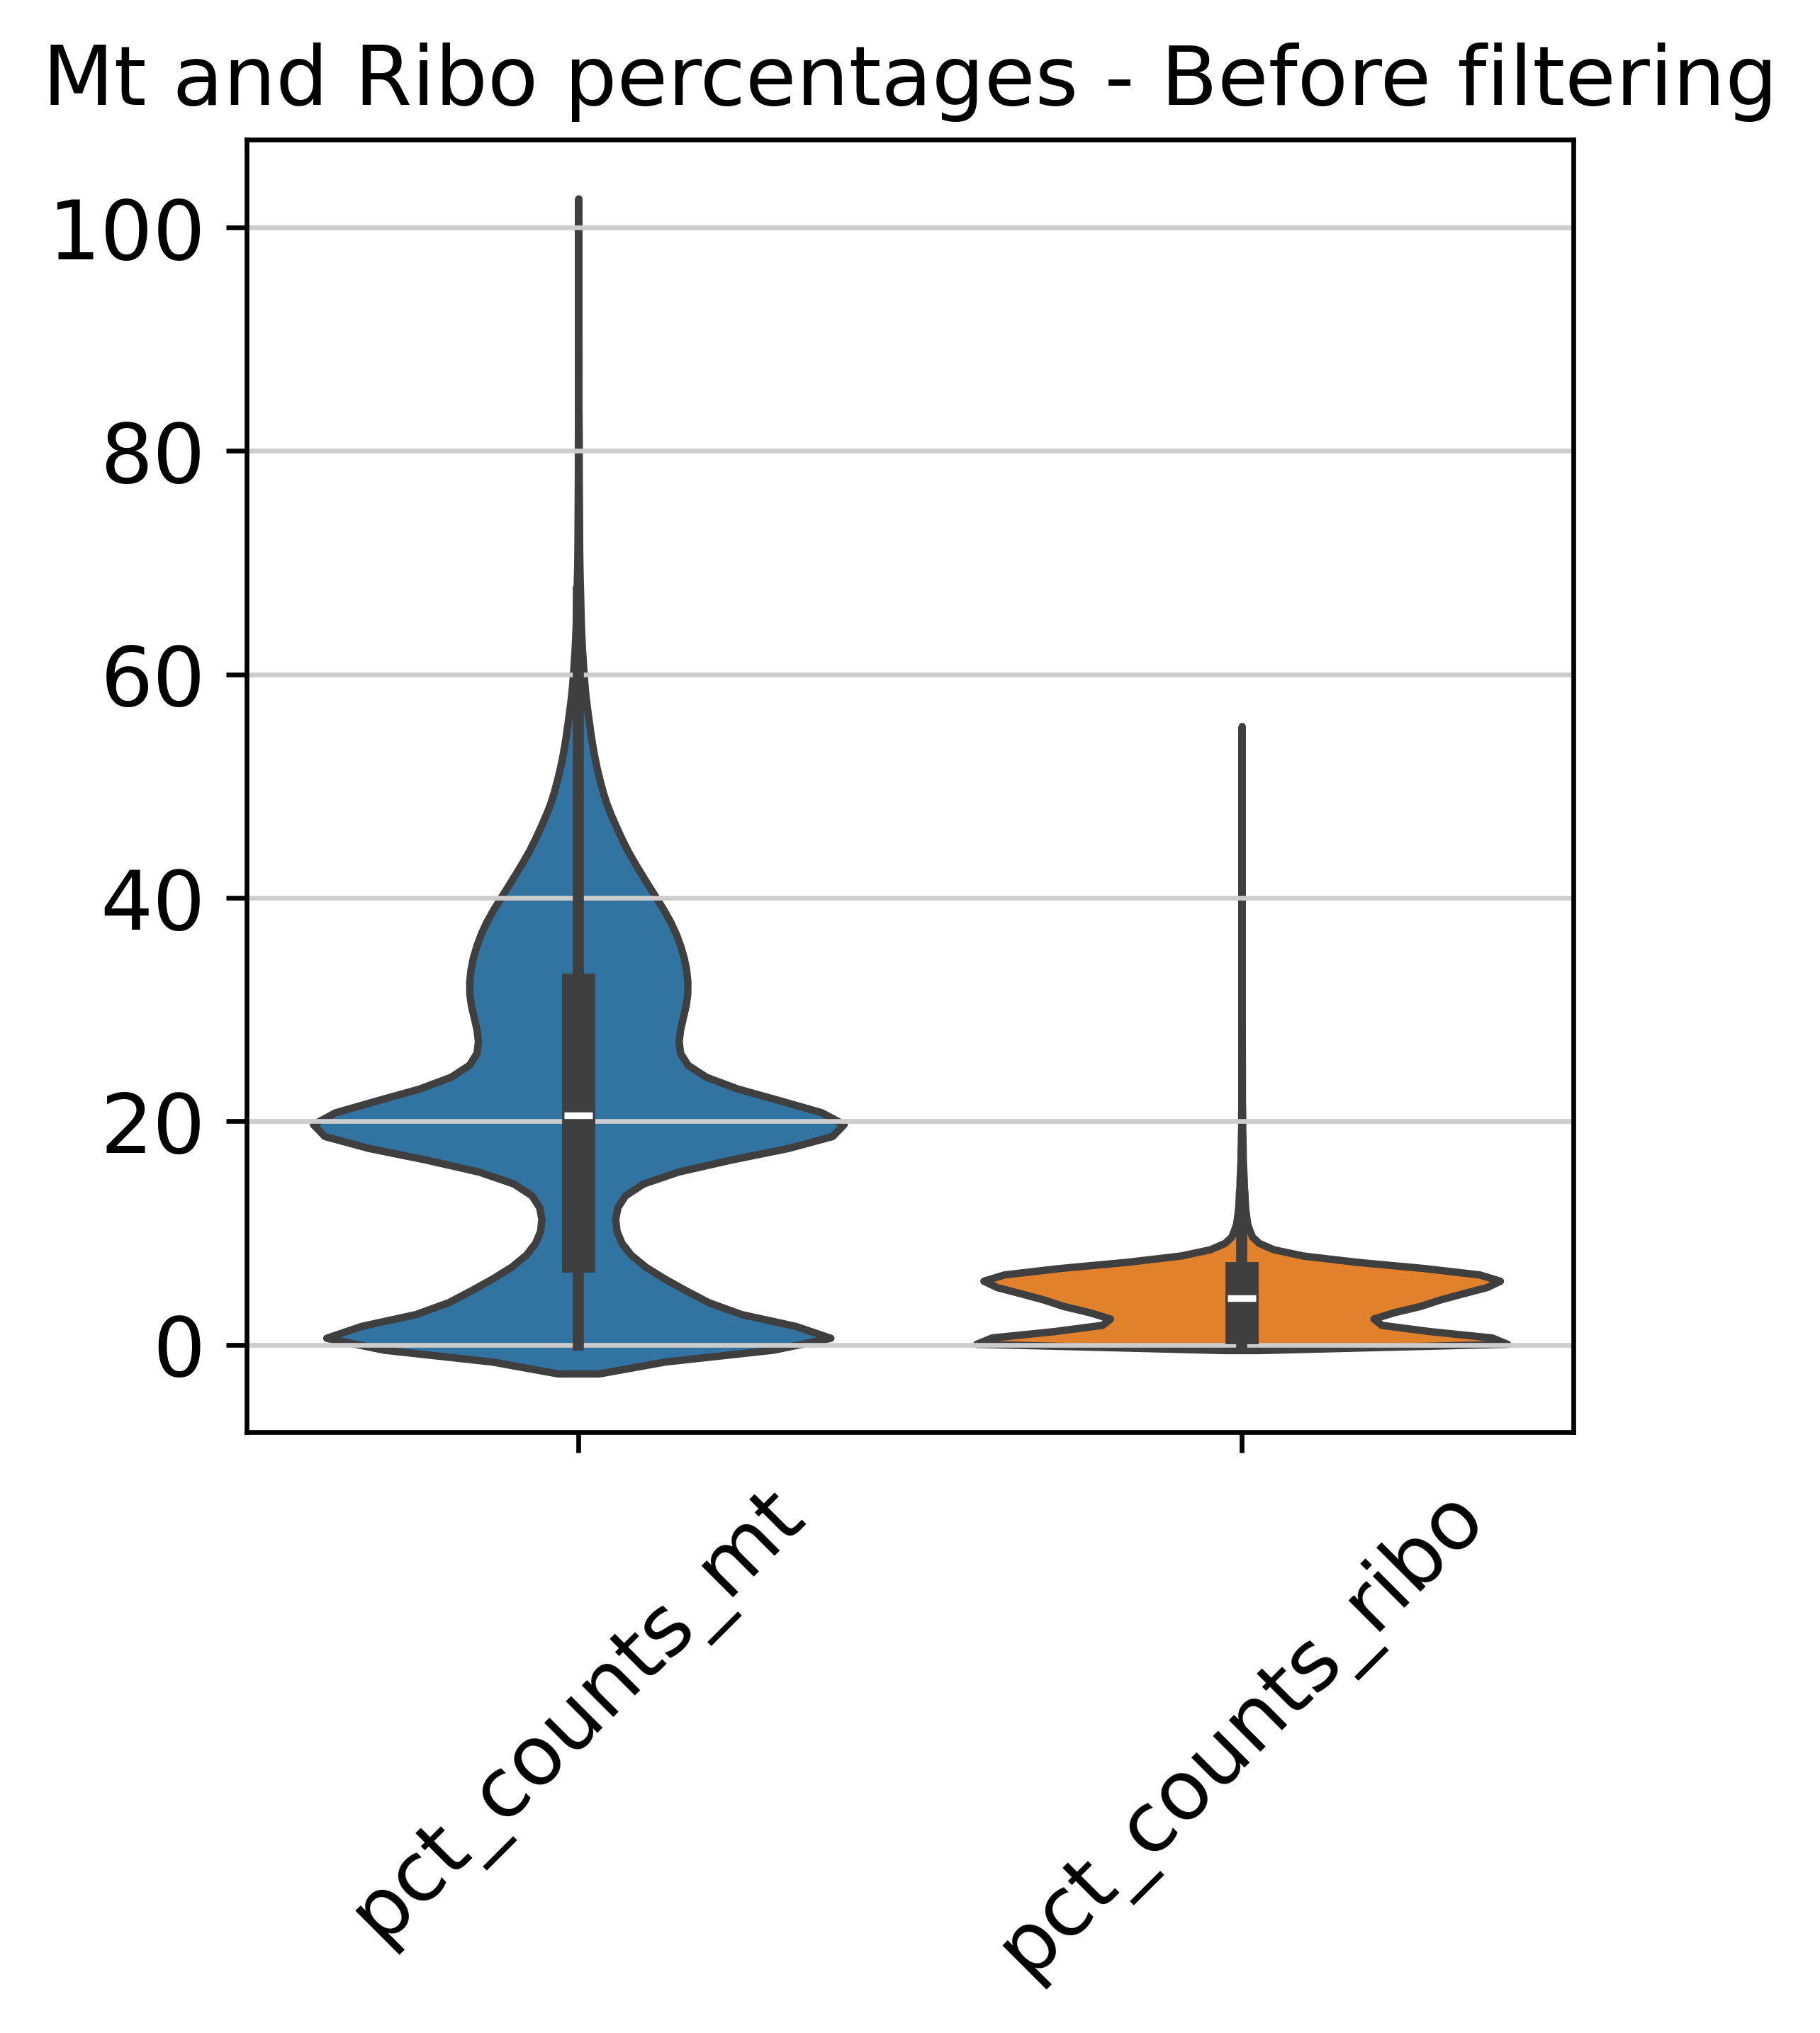

In [18]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sns.violinplot(data=after_cb.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

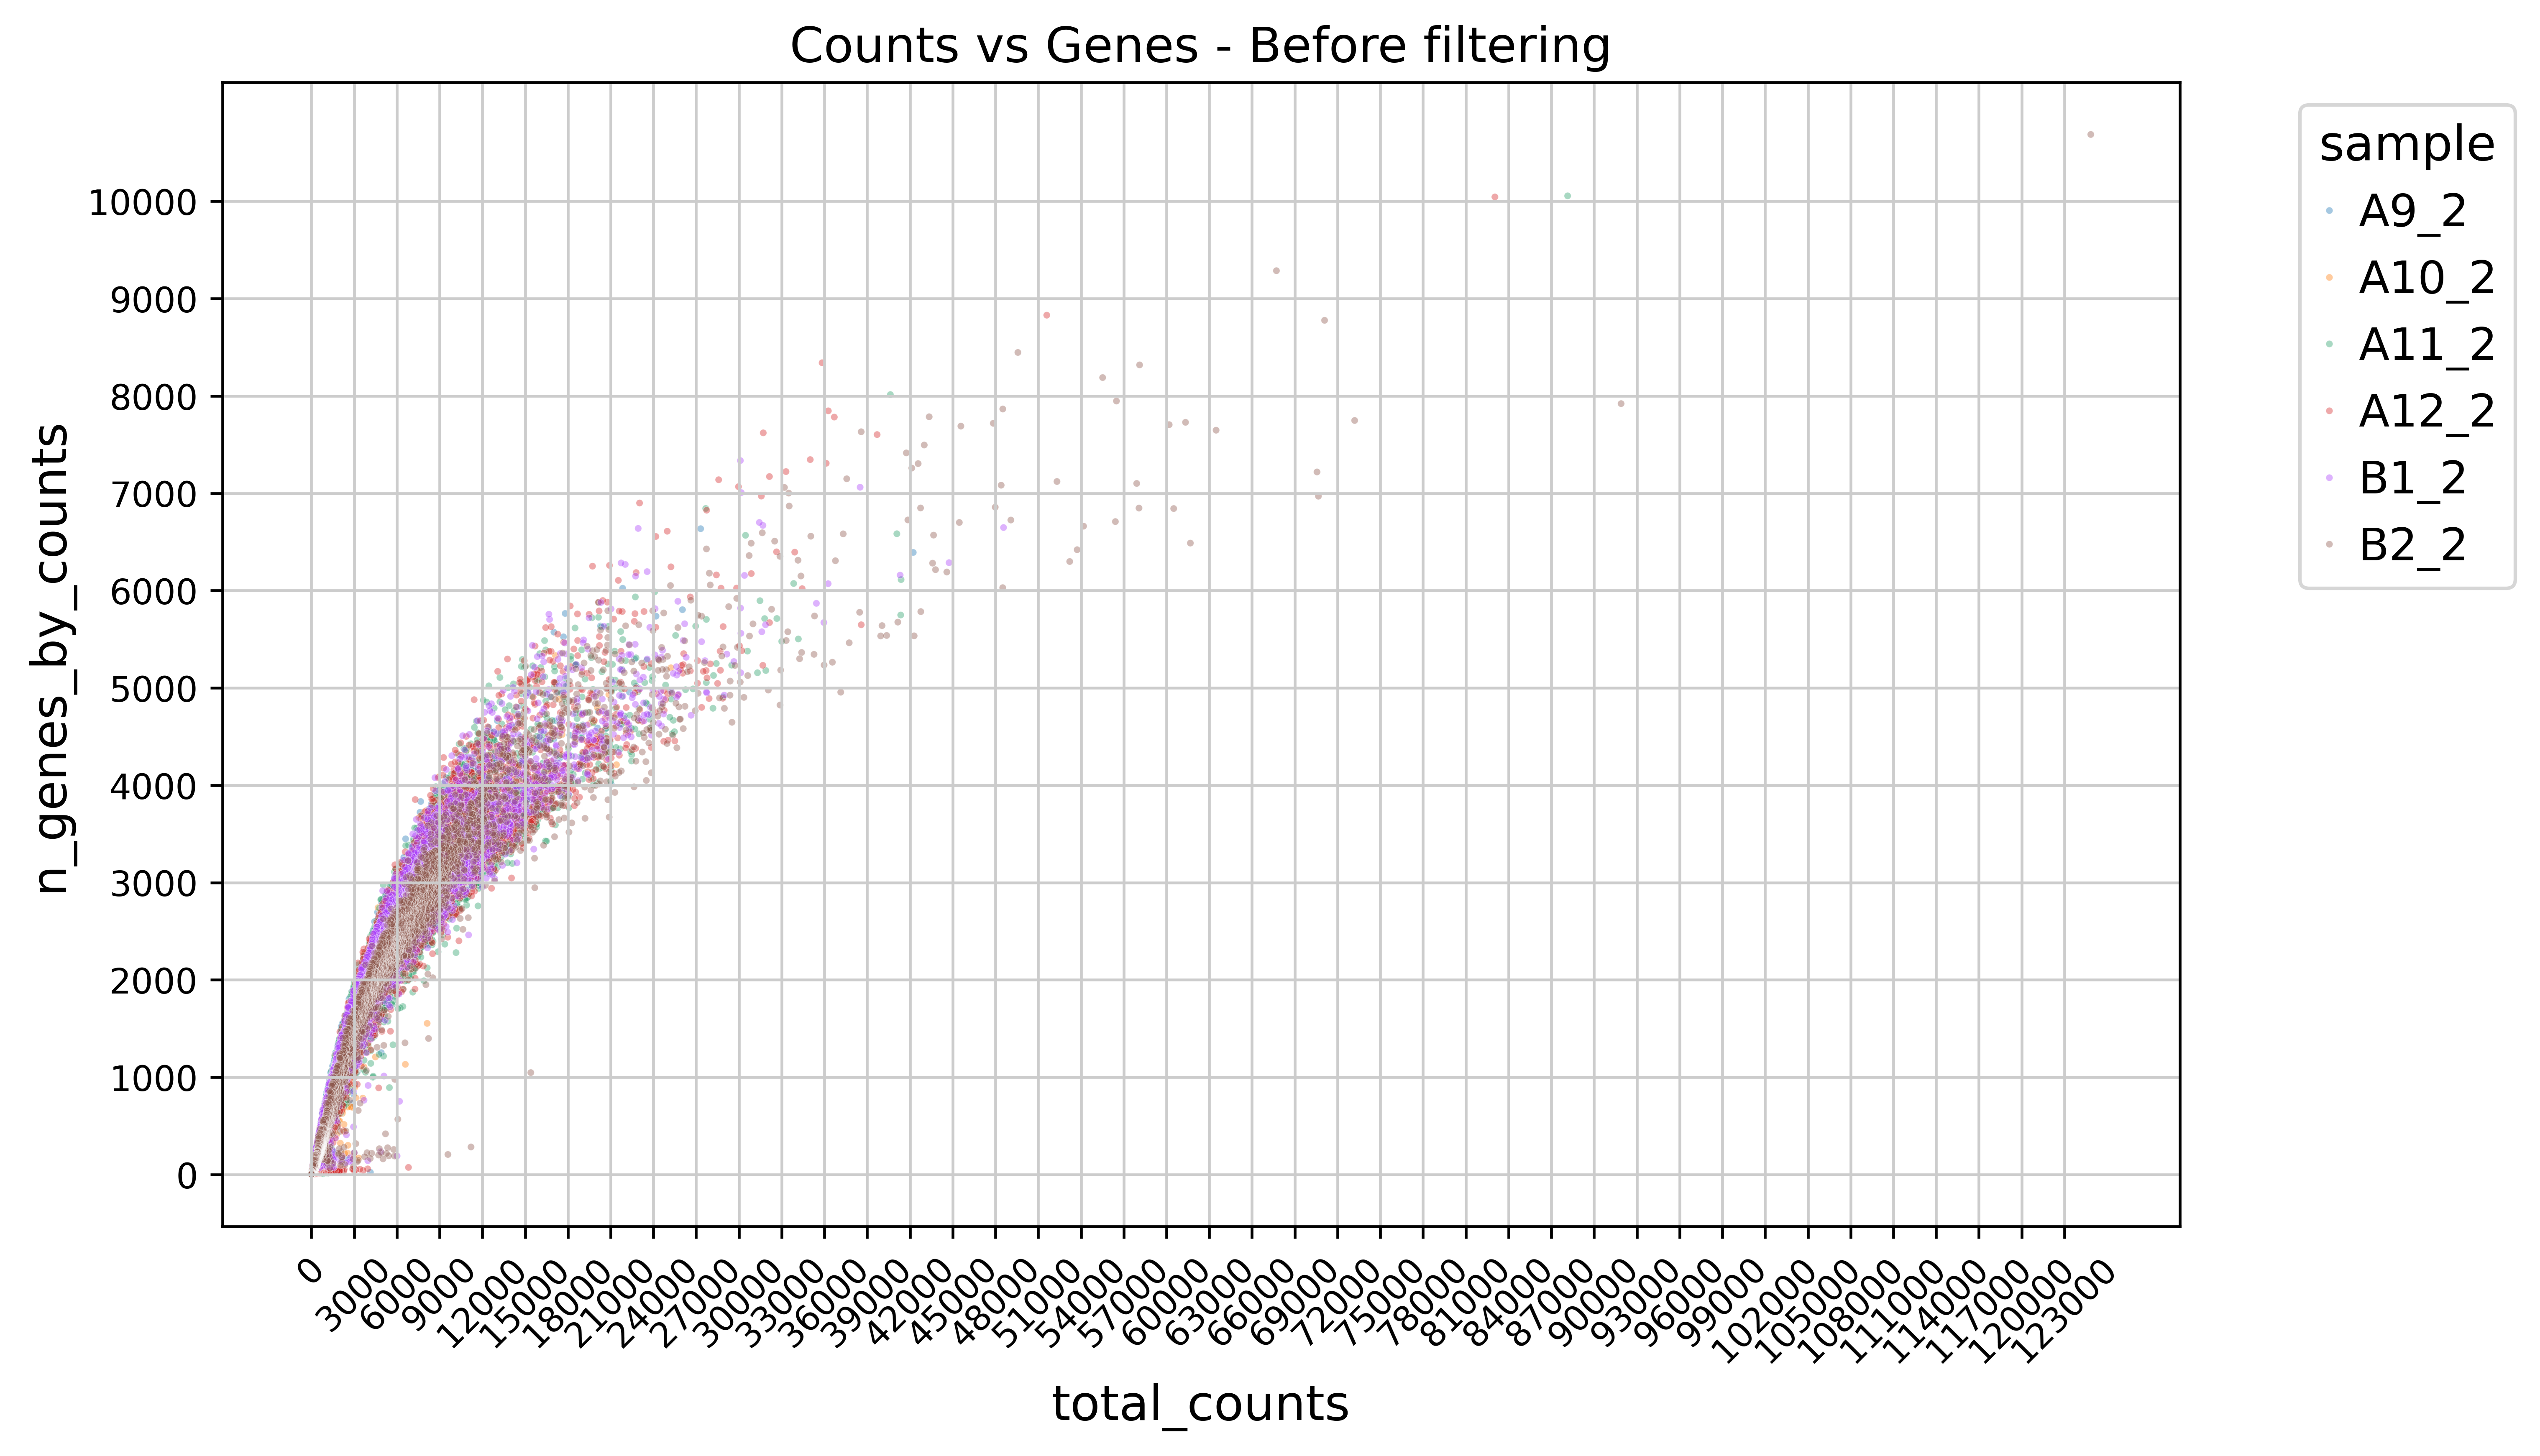

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=after_cb.obs, x='total_counts', y='n_genes_by_counts' , hue ='sample', alpha = 0.4, s=4)
plt.legend(title='sample', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, int(max(after_cb.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(after_cb.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

In [20]:
filtered_object = after_cb[after_cb.obs['n_genes_by_counts'] > 200]
filtered_object = filtered_object[filtered_object.obs['n_genes_by_counts'] < 6000]

filtered_object = filtered_object[filtered_object.obs['total_counts'] > 200]
filtered_object = filtered_object[filtered_object.obs['total_counts'] < 18000]

filtered_object = filtered_object[filtered_object.obs['pct_counts_mt'] < 60]
filtered_object = filtered_object[filtered_object.obs['pct_counts_ribo'] < 20]

filtered_object = filtered_object[filtered_object.obs['doublet_scores'] < 0.35]

filtered_object

View of AnnData object with n_obs × n_vars = 124913 × 32285
    obs: 'sample', 'genotype', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

## HVG

In [21]:
sc.pp.highly_variable_genes(filtered_object,flavor = "seurat_v3",batch_key = "sample",subset = True, n_top_genes= 8000)
filtered_object

extracting highly variable genes


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:172: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


AnnData object with n_obs × n_vars = 124913 × 8000
    obs: 'sample', 'genotype', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg'

## Normalization

In [22]:
sc.pp.normalize_total(filtered_object, target_sum= 1e6)
sc.pp.log1p(filtered_object)
filtered_object.layers["normalized"] = filtered_object.X.copy()

normalizing counts per cell
    finished (0:00:00)


In [23]:
print(X_is_raw(filtered_object))

False


## Prinicipal Component Analysis

In [24]:
sc.pp.pca(filtered_object, n_comps = 50, use_highly_variable = True, svd_solver = 'arpack', random_state = 1712)
sc.pp.neighbors(filtered_object, use_rep = "X_pca", n_neighbors = 50, metric = 'minkowski', random_state = 1786)

computing PCA
    with n_comps=50


/home/guest/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:30)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:35)


## Batch Correction

In [25]:
bbknn_donor = bbknn.bbknn(filtered_object, 
    batch_key = "sample", copy = True)
bbknn_donor

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


AnnData object with n_obs × n_vars = 124913 × 8000
    obs: 'sample', 'genotype', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [26]:
sc.tl.umap(bbknn_donor)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:39)


# Gene expression after QC

In [28]:
genes_of_interest = ["Ttn", "Dcn", "Dmd"]


for sample in sample_dirs:
    sample_data = bbknn_donor[bbknn_donor.obs['sample'] == sample].copy()

    for gene in genes_of_interest:
        if gene in sample_data.var_names:
            sc.pl.umap(sample_data, color=gene, save=f"_{sample}_{gene}_after_qc.png", show=False)
            print(f"Saved UMAP for {sample} - {gene}")
        else:
            print(f"Warning: Gene {gene} not found in {sample}")

Saved UMAP for A9_2 - Ttn
Saved UMAP for A9_2 - Dcn
Saved UMAP for A9_2 - Dmd
Saved UMAP for A10_2 - Ttn
Saved UMAP for A10_2 - Dcn
Saved UMAP for A10_2 - Dmd
Saved UMAP for A11_2 - Ttn
Saved UMAP for A11_2 - Dcn
Saved UMAP for A11_2 - Dmd
Saved UMAP for A12_2 - Ttn
Saved UMAP for A12_2 - Dcn
Saved UMAP for A12_2 - Dmd
Saved UMAP for B1_2 - Ttn
Saved UMAP for B1_2 - Dcn
Saved UMAP for B1_2 - Dmd
Saved UMAP for B2_2 - Ttn
Saved UMAP for B2_2 - Dcn
Saved UMAP for B2_2 - Dmd
